In [1]:
import glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline


In [2]:
def getLabel(files_tr):
    y=[];
    singers={0:'Arijit Singh',1:'Hemanta',2:'Kumar Sanu',3:'Md. Rafi'}
    for name in files_tr:
        singer=name.split('\\')[1][:2]
        if(singer=='AS'):
            y.append(0)
        elif(singer=='HM'):
            y.append(1)
        elif(singer=='KS'):
            y.append(2)
        else:
            y.append(3)
    return np.array(y)

In [3]:
def getFeature(files):
    arr_train = np.empty((21540))
    for file in files:
        y, sr = librosa.load(file)    
        s =  librosa.feature.mfcc(y, sr=sr)    
        s = s.flatten()
        arr_train = np.vstack((arr_train, s))
    arr=arr_train[1:]
    return arr

In [4]:
def scale(arr):
    mn=np.mean(arr,axis=0)
    sd=np.std(arr,axis=0);
    return (arr-mn)/sd    

In [5]:
files_train = glob.glob("Arijit_Rafi_Hemanta_Sanu_Train/*.wav")
files_test=glob.glob("Arijit_Rafi_Hemanta_Sanu_Test/*.wav")

In [6]:
x_train = getFeature(files_train)
x_test = getFeature(files_test)
y_train =  getLabel(files_train)
y_test = getLabel(files_test)

x_train = scale(x_train)
x_test = scale(x_test)

In [7]:
logReg=LogisticRegression()
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
pred = logReg.predict(x_test)
score = logReg.score(x_test, y_test)
print(score)

0.925


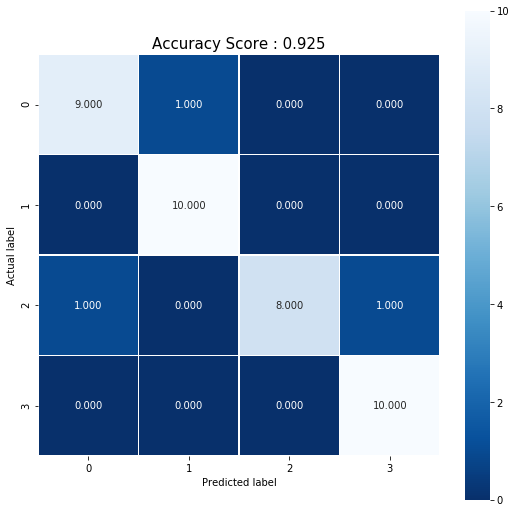

In [9]:
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidth = .5, square=True, cmap = 'Blues_r') #annot is to write values within matrix
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [10]:
x=[[1,2,3],[4,5,6]]

In [11]:
x=np.array(x)


In [12]:
x


array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
x.mean()

3.5

In [14]:
mn=np.mean(x,axis=0)
sd=np.std(x,axis=0)

In [15]:
print(mn)
print(sd)

[2.5 3.5 4.5]
[1.5 1.5 1.5]


In [16]:
(x-mn)


array([[-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5]])

In [55]:
c=['red','green','blue','black']
color=[]
for i in y_train:
    color.append(c[i])

In [75]:
y_test-pred

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])